# Držík: Klasifikácia zdravia ľudského plodu na základe údajov CTG

## 0. Import knižníc 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Preskúmanie datasetu 

In [2]:
# Načítame si csv súbor pomocou knižnice pandas do premennej data
# Zdrojový dataset (v .csv) už obsahuje header, 
# preto nemusíme pri načítavaní nič prispôsobovať, iba musíme nastaviť separátor na "," 
data = pd.read_csv("fetal_health.csv", sep=",")

In [3]:
# Obsah premennej data si necháme vypísať. Zistíme, že dataset obsahuje 2126 riadkov (záznamov) a 22 stĺpcov
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
# Zobrazíme si pomocou metódy info() dátové typy jednotlivých stĺpcov a počet nenulových hodnôt jednotlivých stĺpcov
data.info()
# Zistili sme, že v našom datasete máme všetky hodnoty nenulové a všetky hodnoty sú číselného typu float64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
# Metódou describe() dostaneme základný štatistický prehľad o našom datasete (v transponovanom tvare)
data.describe().T
# Už tu môžeme vidieť, že rozpätie hodnôt je veľmi vysoké. Pre príklad parameter "accelerations" má minimálnu hodnotu 0.0
# a maximálnu hodnotu 0.019 a parameter "abnormal_short_term_variability" má minimum 12.0 a maximum 87.
# Údaje sú príliž rôznorodé, bude ich treba znormalizovať (zoškálovať).

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Dátový súbor obsahuje dáta z  kardiotokogramu (CTG), na základe ktorých sa dá jednoducho posúdiť zdravie ľudského plodu. Samotné zariadenie funguje tak, že vysiela ultrazvukové impulzy a číta jeho odozvu, čím získava tepovú frekvenciu srdca, pohyby plodu, kontrakcie maternice a ďalšie. Odborníci na základe jednotlivých dát zaklasifikovali zdravie plodu. Určili 3 triedy (fetal_health):
- <b>Normal</b> = označený ako 1 v datasete, klasifikovaný ako zdravý
- <b>Suspect</b> = označený ako 2 v datasete, klasifikovaný ako podozrivý
- <b>Pathological</b> = označený ako 3 v datasete, klasifikovaný ako nezdravý

<b>Získané charakteristiky z CTG:</b>

- '<b>baseline value</b>' = Tepová frekvencia srdca plodu za minútu
- '<b>accelerations</b>' = Zrýchlenie (zvýšenie srdcovej frekvencie) za sekundu
- '<b>fetal_movement</b>' = Počet pohybov plodu za sekundu
- '<b>uterine_contractions</b>' = Počet kontrakcií maternice za sekundu
- '<b>light_decelerations</b>' = Počet miernych spomalení tepovej frekvencie za sekundu 
- '<b>severe_decelerations</b>' = Počet prudkých spomalení tepovej frekvencie za sekundu
- '<b>prolongued_decelerations</b>' = Počet dlho trvajúcich spomalení tepovej frekvencie za sekundu
- '<b>abnormal_short_term_variability</b>' = Percento času s abnormálnou krátkodobou variabilitou
- '<b>mean_value_of_short_term_variability</b>' = Priemerná hodnota krátkodobej variability
- '<b>percentage_of_time_with_abnormal_long_term_variability</b>' = Percento času s abnormálnou dlhodobou variabilitou
- '<b>mean_value_of_long_term_variability</b>' = Priemerná hodnota dlhodobej variability
- '<b>histogram_width</b>' = Šírka histogramu tepovej frekvencie plodu
- '<b>histogram_min</b>' = Minimum (najnižšia frekvencia) z histogramu tepovej frekvencie plodu
- '<b>histogram_max</b>' = Maximum (najvyššia frekvencia) z histogramu tepovej frekvencie plodu
- '<b>histogram_number_of_peaks</b>' = Počet maximálnych hodnôt histogramu
- '<b>histogram_number_of_zeroes</b>' = Počet minimálnych hodnôt histogramu
- '<b>histogram_mode</b>' = Modus histogramu
- '<b>histogram_mean</b>' = Priemer histogramu
- '<b>histogram_median</b>' = Medián histogramu
- '<b>histogram_variance</b>' = Rozptyl histogramu
- '<b>histogram_tendency</b>' = Tendencia histogramu

<b>Výsledný zdravotný stav plodu na základe údajov z CTG:</b>

- '<b>fetal_health</b>' Normal (1), Suspect (2) a Pathological (3)

Zdroj: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6822315/

## 2. Analýza dát  

      Normal (1): 1655
     Suspect (2): 295
Pathological (3): 176
___________________________
           Spolu: 2126


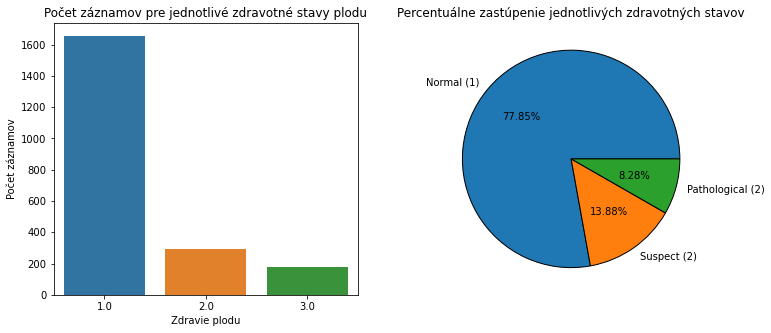

In [6]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x="fetal_health", data=data)

plt.title("Počet záznamov pre jednotlivé zdravotné stavy plodu")
plt.xlabel("Zdravie plodu")
plt.ylabel("Počet záznamov")

plt.subplot(122)
normal = data[data['fetal_health'] == 1].count()[0]
suspect = data[data['fetal_health'] == 2].count()[0]
pathological = data[data['fetal_health'] == 3].count()[0]
plt.pie([normal, suspect, pathological], labels=["Normal (1)", "Suspect (2)", "Pathological (2)"], autopct="%1.2f%%",wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

plt.title("Percentuálne zastúpenie jednotlivých zdravotných stavov") 

print("      Normal (1):",normal)
print("     Suspect (2):",suspect)
print("Pathological (3):",pathological)
print("___________________________")
print("           Spolu:",normal + suspect + pathological)

V jednom aj v druhom grafe je vidieť, že výsledné zdravotné stavy nie sú v datasete rovnomerne zastúpené. Konkrétne 75.85% záznamov bolo kategorizovaných ako zdravotný stav Normal (1), 13.88% ako zdravotný stav Suspect (2) a najmenej bolo kategorizovaných do zdravotného stavu Pathological (3), presne 8.28%.

Text(0.5, 1.0, 'Tepová frekvencia plodu pre každý zdravotný stav')

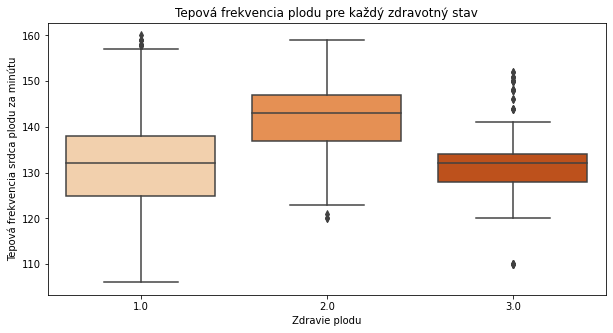

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x = data['fetal_health'], y = data['baseline value'], data = data, palette="Oranges")
plt.xlabel("Zdravie plodu")
plt.ylabel("Tepová frekvencia srdca plodu za minútu")
plt.title("Tepová frekvencia plodu pre každý zdravotný stav")

<AxesSubplot:>

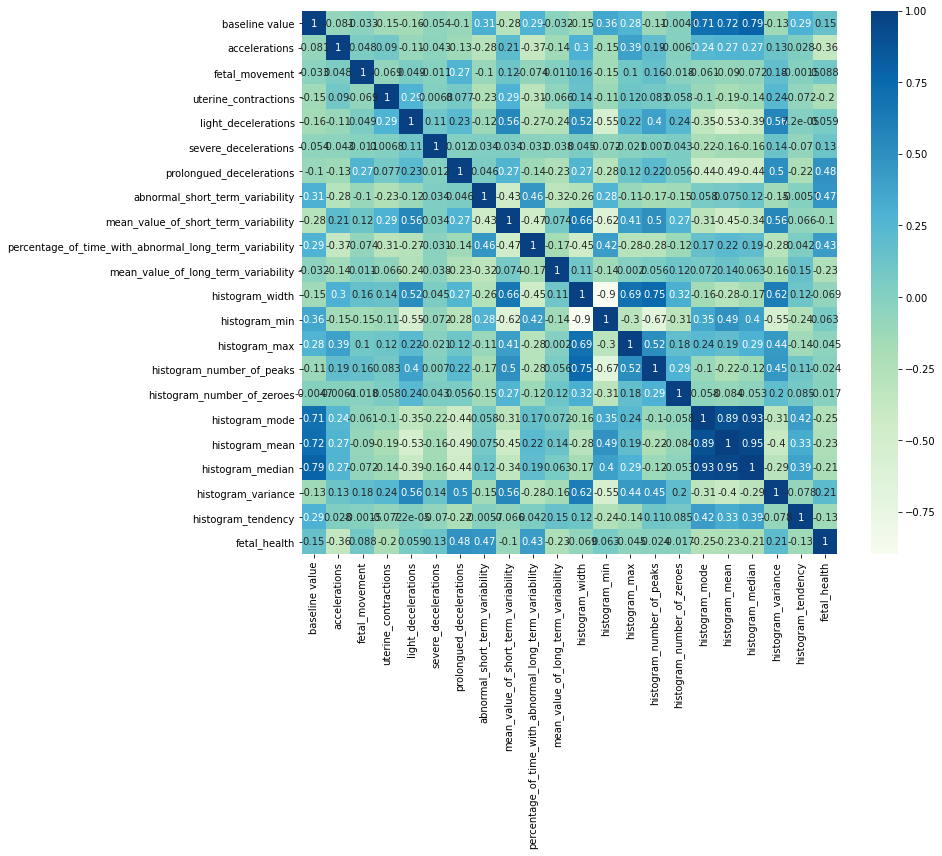

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap = "GnBu")  